# Book Recommender 

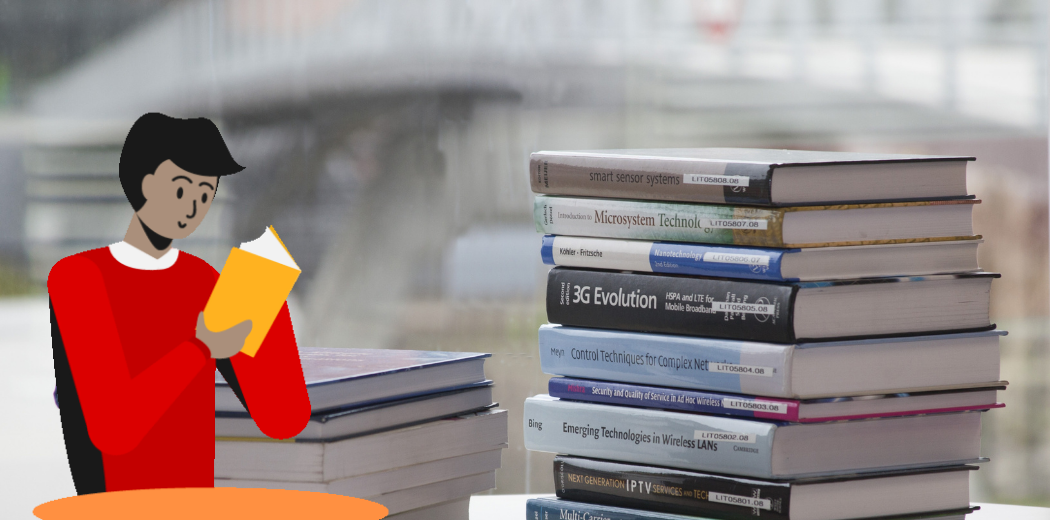

#### Objective:
The objective of this project is to create a recommender system for books. 

#### Dataset:
https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset?resource=download

#### Methodology
- Collaborative Filtering
- Content-based Filtering

#### Goal 
To build a recommendation system using different methodologies to produce the most accurate results. 

## Data Upload

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('data/Preprocessed_data.csv')

In [3]:
df.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


In [4]:
df.shape

(1031175, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1031175 non-null  int64  
 1   user_id              1031175 non-null  int64  
 2   location             1031175 non-null  object 
 3   age                  1031175 non-null  float64
 4   isbn                 1031175 non-null  object 
 5   rating               1031175 non-null  int64  
 6   book_title           1031175 non-null  object 
 7   book_author          1031175 non-null  object 
 8   year_of_publication  1031175 non-null  float64
 9   publisher            1031175 non-null  object 
 10  img_s                1031175 non-null  object 
 11  img_m                1031175 non-null  object 
 12  img_l                1031175 non-null  object 
 13  Summary              1031175 non-null  object 
 14  Language             1031175 non-null  object 
 15

In [6]:
df.isnull().sum()

Unnamed: 0                 0
user_id                    0
location                   0
age                        0
isbn                       0
rating                     0
book_title                 0
book_author                0
year_of_publication        0
publisher                  0
img_s                      0
img_m                      0
img_l                      0
Summary                    0
Language                   0
Category                   0
city                   14103
state                  22798
country                35374
dtype: int64

Total columns 1031175 entries. 

Columns with null values = ['city','state','country']

Each data entry appears to be rating that a user inputs.

For the sake of our initial recommendation system, we won't be using the meta data (images), so we will be taking out the unneeded columns now.

In [7]:
df = df.drop(['Unnamed: 0','img_s','img_m','img_l'], axis= 1)

In [8]:
# Convert the Year column to integers
df['year_of_publication'] = df['year_of_publication'].astype(int)

# Exploratory Data Analysis

## Categorical Variables

In [9]:
selected_columns = ['user_id','book_title', 'book_author' ,'publisher', 'Language', 'Category', 'city', 'state', 'country']

# Empty dictionary to store the value counts for each selected column
value_counts_dict = {}

# Iterate over the list of categorical columns
for column in selected_columns:
    value_counts_dict[column] = df[column].value_counts()

# To display the value counts for all the specified columns
for column, value_counts in value_counts_dict.items():
    print(f"Value counts for {column}:")
    print(value_counts, "\n")  # Printing a newline for better readability between columns


Value counts for user_id:
11676     11144
198711     6456
153662     5814
98391      5779
35859      5646
          ...  
120602        1
68986         1
41015         1
52228         1
278729        1
Name: user_id, Length: 92107, dtype: int64 

Value counts for book_title:
Wild Animus                                            2502
The Lovely Bones: A Novel                              1295
The Da Vinci Code                                       898
A Painted House                                         838
The Nanny Diaries: A Novel                              828
                                                       ... 
Hippity-Hop: A Pudgy Book (Pudgy Board Book)              1
The Call of the Wild and Other Stories                    1
Hold That Thought                                         1
Cliff Sheats' Lean Bodies Cookbook                        1
Dallas Street Map Guide and Directory, 2000 Edition       1
Name: book_title, Length: 241090, dtype: int64 

Value counts fo

In the above value_counts of the categorical columns, we notice that the most frequent value in 'Category' column is 9. This may indicate an error in the data, since that label doesn't make sense. 

In [10]:
df[df['Category'] == '9']

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,Summary,Language,Category,city,state,country
68,8,"timmins, ontario, canada",34.7439,0671870432,0,PLEADING GUILTY,Scott Turow,1993,Audioworks,9,9,9,timmins,ontario,canada
69,11676,"n/a, n/a, n/a",34.7439,0671870432,8,PLEADING GUILTY,Scott Turow,1993,Audioworks,9,9,9,NaN,NaN,NaN
70,24539,"cabrils, catalunya, spain",34.7439,0671870432,0,PLEADING GUILTY,Scott Turow,1993,Audioworks,9,9,9,cabrils,catalunya,spain
80,8,"timmins, ontario, canada",34.7439,0887841740,5,The Middle Stories,Sheila Heti,2004,House of Anansi Press,9,9,9,timmins,ontario,canada
81,92861,"vancouver, british columbia, canada",34.7439,0887841740,0,The Middle Stories,Sheila Heti,2004,House of Anansi Press,9,9,9,vancouver,british columbia,canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031161,278843,"pismo beach, california, usa",28.0000,0373262388,0,Mr Donaghue Investigates (Ulysses Donaghue Mys...,Anna Shone,1997,Worldwide Library,9,9,9,pismo beach,california,usa
1031163,278843,"pismo beach, california, usa",28.0000,0743525493,7,The Motley Fool's What To Do with Your Money N...,David Gardner,2002,Simon & Schuster Audio,9,9,9,pismo beach,california,usa
1031167,278851,"dallas, texas, usa",33.0000,0028630289,0,Frommer's 2000 California (Frommer's Californi...,Erika Lenkert,1999,Frommer's,9,9,9,dallas,texas,usa
1031172,278851,"dallas, texas, usa",33.0000,0884159221,7,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985,Lone Star Books,9,9,9,dallas,texas,usa


In [11]:
df['Language'].value_counts()
df['Summary'].value_counts()

9                                                                                                                                                                                                                                           398937
Wild animus is a search for the primordial, a test of human\nfoundations and a journey to the breaking point.                                                                                                                                 2502
Harvard symbologist Robert Langdon and French cryptologist Sophie\nNeveu work to solve the murder of an elderly curator of the Louvre, a\ncase which leads to clues hidden in the works of Da Vinci and a\ncenturies-old secret society.       892
A NOVEL ABOUT THE COMPLEX BONDS BETWEEN A MOTHER AND A DAUGHTER.                                                                                                                                                                               732
Told in Dinah&#39;s voice, t

We notice a similar pattern in the Language and Summary categories as well.

In [12]:
df.loc[df['book_title'] == '1,003 Great Things About Teachers']

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,Summary,Language,Category,city,state,country
981104,203240,"st. louis, missouri, usa",32.0000,1567315070,0,"1,003 Great Things About Teachers",Birnbach,2002,MJF Books,9,9,9,st. louis,missouri,usa
981105,208019,"tomball, texas, usa",34.7439,1567315070,9,"1,003 Great Things About Teachers",Birnbach,2002,MJF Books,9,9,9,tomball,texas,usa
1009244,241033,"columbus, ohio, usa",26.0000,0740709895,3,"1,003 Great Things About Teachers",Lisa Birnbach,2000,Andrews McMeel Publishing,This wonderfully humorous book features entrie...,en,['Humor'],columbus,ohio,usa


Notice here: there are books with the same title with differing ISBNs. This can indicate that a book was republished in the future or a new interpretation was made by another publisher. However, for our purposes, those books would be identified as two unique books. As the unique identifiers of the books, we'll be using ISBNs instead of book title. 

## Numerical Variables

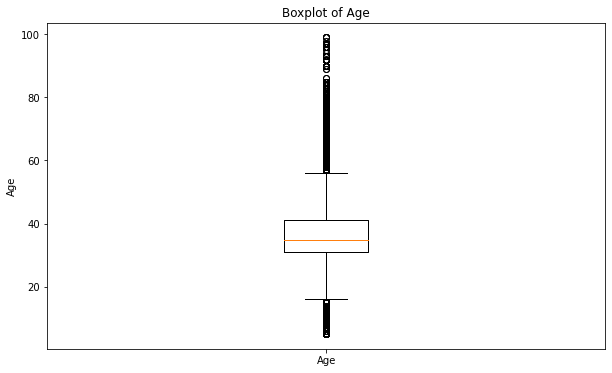

In [13]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['age'])  
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.xticks([1], ['Age']) 
plt.show()

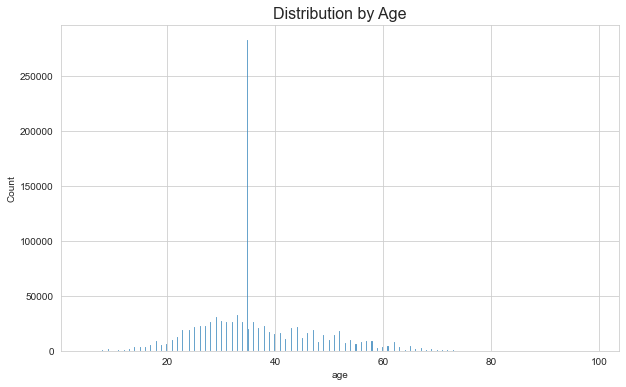

In [14]:
sns.set_style('whitegrid')

plt.figure(figsize = (10,6))

sns.histplot(x='age', data = df, palette = 'Set2')
plt.title('Distribution by Age', fontsize=16)

plt.show()

There is a massive spike in density around 35 years old. This indicates that there may be a default value that is placed for users that didn't provide their age. For example, the average.

In [15]:
df['age'].value_counts()

34.7439    282595
33.0000     32864
29.0000     30648
30.0000     27202
32.0000     26492
            ...  
86.0000         2
89.0000         2
94.0000         1
95.0000         1
98.0000         1
Name: age, Length: 93, dtype: int64

34.7439 seems to be the default value. This may confuse our model since the data doesn't provide meaning. We will keep this in mind if age is used in our future models.

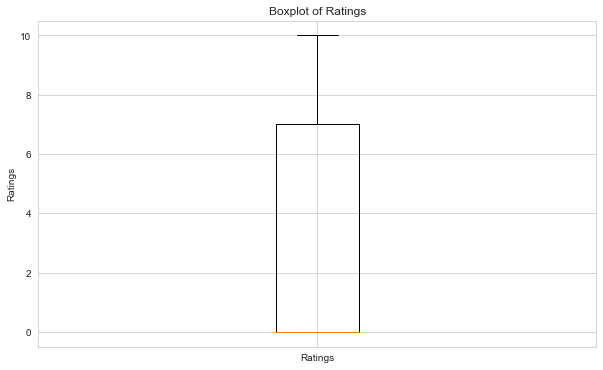

In [16]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['rating'])  
plt.title('Boxplot of Ratings')
plt.ylabel('Ratings')
plt.xticks([1], ['Ratings']) 
plt.show()

In [17]:
df[['age', 'rating']].corr()

,age,rating
age,1.000000,-0.020143
rating,-0.020143,1.000000


## Initial Plots

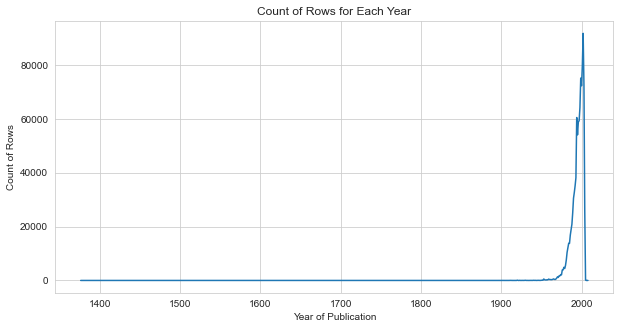

In [18]:
year_counts = df['year_of_publication'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
year_counts.plot(kind='line')
plt.title('Count of Rows for Each Year')
plt.xlabel('Year of Publication')
plt.ylabel('Count of Rows')
plt.grid(True)
plt.show()

We notice that the plot extends to 1400's. This indicates that there may be books that were published in historic times. For our purposes, we will be removing books written previously to 1900's since most of the data seems to be densely populated after 1950's.

In [19]:
min_year = df['year_of_publication'].min()
max_year = df['year_of_publication'].max()

print(f"{min_year},{max_year}.")

1376,2008.


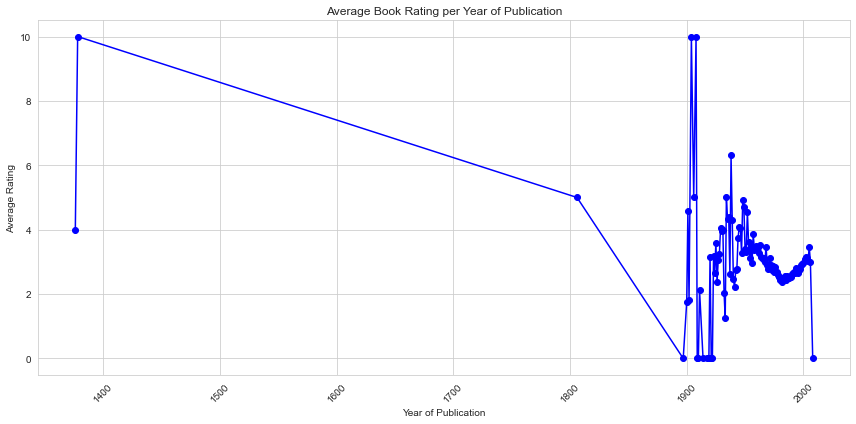

In [20]:
average_rating_per_year = df.groupby('year_of_publication')['rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(average_rating_per_year['year_of_publication'], average_rating_per_year['rating'], marker='o', linestyle='-', color='b')
plt.title('Average Book Rating per Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Average Rating')
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


In [21]:
average_ratings_by_category = df.groupby('Category')['rating'].mean()

print(average_ratings_by_category)

Category
9                                                             2.851055
["ABC's"]                                                     5.000000
["Aesop's fables"]                                            4.666667
["Almanacs, Children's"]                                      0.625000
["Alzheimer's disease"]                                       3.150000
                                                                ...   
['Zoo animals']                                               0.000000
['Zoology']                                                   0.000000
['Zoos']                                                      0.000000
['Zululand (South Africa)']                                   0.000000
['avstrijska književnost - mladinska književnost - roman']    7.000000
Name: rating, Length: 6448, dtype: float64


In [22]:
Book_Count_df=pd.DataFrame(df['book_title'].value_counts())
Book_Count_df.reset_index(inplace=True)
Book_Count_df.rename(columns={'index':'book_title','book_title':'Count'})

,book_title,Count
0,Wild Animus,2502
1,The Lovely Bones: A Novel,1295
2,The Da Vinci Code,898
3,A Painted House,838
4,The Nanny Diaries: A Novel,828
...,...,...
241085,Hippity-Hop: A Pudgy Book (Pudgy Board Book),1
241086,The Call of the Wild and Other Stories,1
241087,Hold That Thought,1
241088,Cliff Sheats' Lean Bodies Cookbook,1


Notes: 
- The above analysis gives a good idea on the top 5 and bottom 5 values for the different categorical variables.
- There seems to be a need of data cleaning on some of the variables.
- The most prominent category is "9" with 406102 instances. This prompts for further research into the variable.
- Room for standardization of column names (snake_case,camelCase,PascalCase, etc)
- Year Column

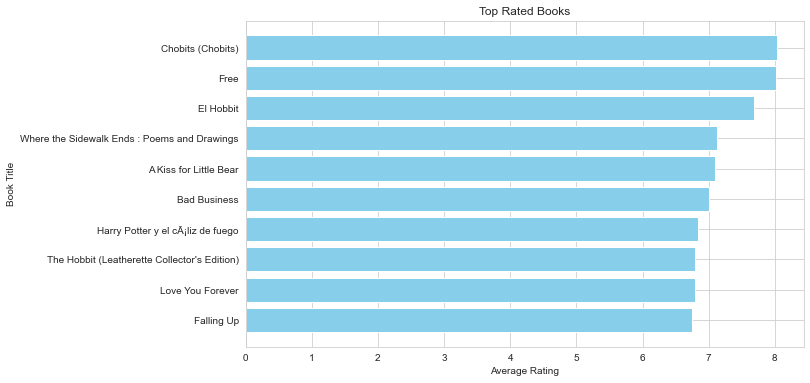

In [23]:
book_ratings = df.groupby('book_title').agg(
    average_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()

min_ratings = 20  
filtered_books = book_ratings[book_ratings['rating_count'] >= min_ratings]

top_books = filtered_books.sort_values(by='average_rating', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_books['book_title'], top_books['average_rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.title('Top Rated Books')
plt.gca().invert_yaxis()  
plt.show()

These are the top 10 rated books with more than 20 reviews. The number of reviews a book has gotten will be important in our future steps. In order to make a recommendation, we need enough information regarding the book and the users who purchased it.

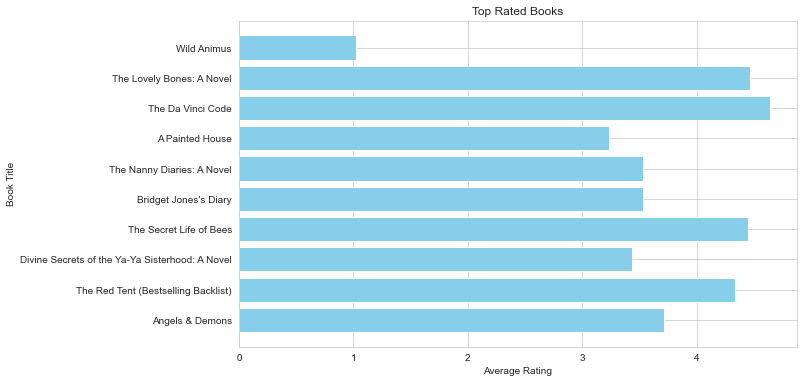

In [24]:
top_rated = filtered_books.sort_values(by='rating_count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_rated['book_title'], top_rated['average_rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.title('Top Rated Books')
plt.gca().invert_yaxis()  
plt.show()

These are the ratings of the books that have the highest number of reviews.

# Further Data Preprocessing

In [25]:
df.head()

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,Summary,Language,Category,city,state,country
0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


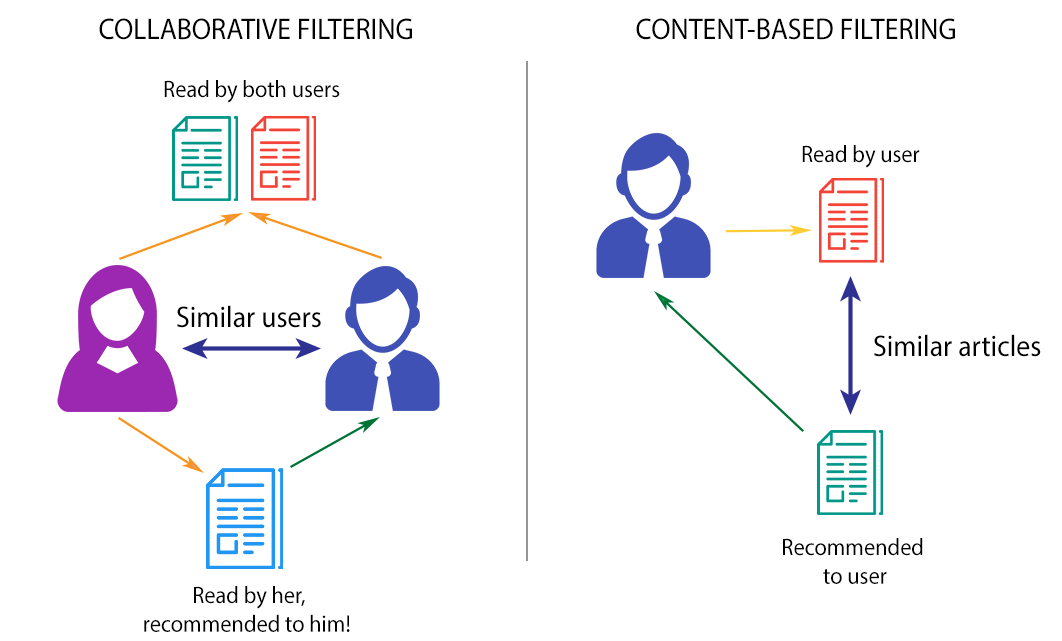

### Popularity-based Recommendation

Our first and most basic approach will be popularity-based recommendation. We will be providing the user with the highest number of reviews and average ratings. This approach ensures that the popular books are recommended to more users since historically more people have purchased the book and rated it highly. 

Note that this approach is not specific to the user, which is a large shortcoming for recommendation models

In [26]:
ratings_count = df.groupby('book_title').count()['rating'].reset_index()
ratings_avg = df.groupby('book_title').mean()['rating'].reset_index()
popular_books = ratings_count.merge(ratings_avg,on='book_title')
popular_books.rename(columns={'rating_x':'num_ratings','rating_y':'avg_ratings'},inplace=True)
popular_books = popular_books[popular_books['num_ratings']>=50].sort_values('avg_ratings',ascending=False)
popular_books.merge(df, on='book_title', how='inner').drop_duplicates('book_title')

,book_title,num_ratings,avg_ratings,user_id,location,age,isbn,rating,book_author,year_of_publication,publisher,Summary,Language,Category,city,state,country
0,Free,56,8.017857,2345,"london, england, united kingdom",55.0000,1844262553,9,Paul Vincent,2003,Upfront Publishing,Printed on the top left of the envelope was th...,en,['Fiction'],london,england,united kingdom
56,The Stand (The Complete and Uncut Edition),57,6.175439,2759,"woodstock, new york, usa",34.7439,0385199570,10,Stephen King,1990,Doubleday Books,Reissue. Now Stephen King&#39;s apocalyptic vi...,en,['Fiction'],woodstock,new york,usa
113,Griffin & Sabine: An Extraordinary Correspondence,72,6.041667,6575,"seattle, washington, usa",34.7439,0877017883,9,Nick Bantock,1991,Chronicle Books,"Don&#39;t miss The Pharos Gate, the final volu...",en,['Fiction'],seattle,washington,usa
185,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,254,"minneapolis, minnesota, usa",24.0000,0439136350,9,J. K. Rowling,1999,Scholastic,During his third year at Hogwarts School for w...,en,['Juvenile Fiction'],minneapolis,minnesota,usa
613,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,254,"minneapolis, minnesota, usa",24.0000,0439139597,9,J. K. Rowling,2000,Scholastic,The fourth title in the continuing saga includ...,en,['Juvenile Fiction'],minneapolis,minnesota,usa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285992,Wild Animus,2502,1.019584,14,"mediapolis, iowa, usa",34.7439,0971880107,0,Rich Shapero,2004,Too Far,"Wild animus is a search for the primordial, a ...",en,['Fiction'],mediapolis,iowa,usa
288494,A Secret Affair,50,1.000000,1838,"glens falls, new york, usa",34.7439,0061012289,9,Barbara Taylor Bradford,1997,HarperTorch,"In A Secret Affair, she touches on subjects th...",en,['Fiction'],glens falls,new york,usa
288544,Whirlwind,61,1.000000,10030,"pittsburgh, pennsylvania, usa",66.0000,0688066631,0,Clavell,1986,Harpercollins,During the tumultuous days just after the Shah...,en,['Fiction'],pittsburgh,pennsylvania,usa
288605,Ssn,67,0.970149,7983,"longview, washington, usa",26.0000,0425173534,4,Tom Clancy,2000,Berkley Publishing Group,The author&#39;s &quot;forgotten novel&quot; a...,en,['Fiction'],longview,washington,usa


In [27]:
popular_books_df = popular_books.merge(df, on='book_title', how='inner').drop_duplicates('book_title')
popular_books_df = popular_books_df[['book_title','book_author','num_ratings','avg_ratings']]
popular_books_df

,book_title,book_author,num_ratings,avg_ratings
0,Free,Paul Vincent,56,8.017857
56,The Stand (The Complete and Uncut Edition),Stephen King,57,6.175439
113,Griffin & Sabine: An Extraordinary Correspondence,Nick Bantock,72,6.041667
185,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,428,5.852804
613,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,387,5.824289
...,...,...,...,...
285992,Wild Animus,Rich Shapero,2502,1.019584
288494,A Secret Affair,Barbara Taylor Bradford,50,1.000000
288544,Whirlwind,Clavell,61,1.000000
288605,Ssn,Tom Clancy,67,0.970149


From the output above, we can see the most popular books, the corresponding authors and the average ratings. It is no surprise that the most sold novel, "Harry Potter" series, is at the top of the list.

### Collaborative Filtering - (Item-based Collaborative Filtering)

Collaborative filtering is using the previous purchases by others in making the recommendation. Mainly, there are two types of collaborative filtering.

**User-based Collaborative Filtering with KNN:**
In user-based collaborative filtering, the goal is to find users similar to the target user (those who have similar rating patterns across items) and recommend items those similar users have liked. KNN can be used to identify the 'K' nearest or most similar users based on a similarity metric (e.g., cosine similarity, Euclidean distance, Pearson correlation), and then aggregate their ratings to predict the target user’s preference for an item.

**Item-based Collaborative Filtering with KNN:**
Item-based collaborative filtering focuses on finding items similar to those the user has already rated highly. For example, if a user likes a particular book, you recommend other books similar to that book. Again, KNN is used to find the 'K' nearest items based on similarity metrics calculated from user ratings.

In order to do this, we will be using the KNN model. This model allows us to find the books that are closest in terms of the books that were previously rated by the user. We will be first creating a matrix of the ratings the user gave to the books that they purchased. 

In [28]:
ratings_df = df.groupby('user_id').count()['rating']>30

filtered_rating = df[df['user_id'].isin(ratings_df[ratings_df].index)]
filtered_books = filtered_rating.groupby('book_title').count()['rating']>=20

final_ratings = filtered_rating[filtered_rating['book_title'].isin(filtered_books[filtered_books].index)]
matrix = final_ratings.pivot_table(index='book_title',columns='user_id',values='rating')

We selected users that had more than 30 reviews and books that had more than 20 reviews in order to ensure that the model has sufficient information in making the recommedations.

In [29]:
matrix.fillna(0,inplace=True)

In [30]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

ratings_matrix = matrix.values

model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=6, n_jobs=-1)
model_knn.fit(ratings_matrix)

def get_recommendations(book_title, data, model, n_recommendations=5):
    book_list = data.index.tolist()
    book_idx = book_list.index(book_title)
    
    distances, indices = model.kneighbors(data.iloc[book_idx,:].values.reshape(1, -1), n_neighbors=n_recommendations+1)
    
    recommended_books = [book_list[i] for i in indices.flatten()[1:]] 
    
    return recommended_books

In [31]:
# Example usage
book_title = 'The Hobbit : The Enchanting Prelude to The Lord of the Rings'  
if book_title in matrix.index:
    recommendations = get_recommendations(book_title, matrix, model_knn)
    print(f"Recommendations for {book_title}: {recommendations}")
else:
    print("Book not found in the matrix.")

Recommendations for The Hobbit : The Enchanting Prelude to The Lord of the Rings: ['The Two Towers (The Lord of the Rings, Part 2)', 'The Fellowship of the Ring (The Lord of the Rings, Part 1)', 'The Return of the King (The Lord of the Rings, Part 3)', 'Harry Potter and the Chamber of Secrets (Book 2)', 'A Tale of Two Cities']


## Collaborative Filtering - (User-based Collaborative Filtering)

Item-based collaborative filtering works by finding similarities between items rather than between users. Here's why transposing the matrix works:

- In user-based collaborative filtering, the rows of the matrix represent users, and the columns represent items. Each entry is the rating that a user gives to an item.

- In item-based collaborative filtering, we're interested in the similarities between items. To achieve this, we transpose the matrix so that items become rows and users become columns. Now, each entry represents how a set of users have rated two items, allowing us to measure the similarity between items based on user ratings.

The KNN model in item-based collaborative filtering is then used to find items that are similar to each other based on these user ratings. When you query the model with a specific item (by using its index), the model returns the nearest neighbors to this item – in other words, the items most similar to it according to user ratings.

In [32]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

user_item_matrix = matrix.T  

model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=6, n_jobs=-1)
model_knn.fit(user_item_matrix)

def recommend_books(user_index, data, model, n_recommendations=5):
   
    distances, indices = model.kneighbors(data.iloc[user_index, :].values.reshape(1, -1), n_neighbors=n_recommendations + 1)
    similar_users = indices.flatten()[1:]  
    
    book_scores = {}
    for sim_user in similar_users:
        rated_books = data.columns[(data.iloc[sim_user, :] > 0).values] 
        for book in rated_books:
            if book not in book_scores:
                book_scores[book] = 0
            book_scores[book] += 1
    
    user_rated_books = data.columns[(data.iloc[user_index, :] > 0).values]
    recommendations = [(book, score) for book, score in book_scores.items() if book not in user_rated_books]

    recommendations.sort(key=lambda x: x[1], reverse=True)
    
    return recommendations[:n_recommendations]

In [33]:
user_index = 5  
recommended_books = recommend_books(user_index, user_item_matrix, model_knn)
print(f"Recommended books for user {user_index}: {[book for book, score in recommended_books]}")

Recommended books for user 5: ['Lolita (Vintage International)', 'Killing Critics (Kathleen Mallory Novels (Paperback))', 'Long After Midnight', 'Stormy Weather', 'The Face of Deception']


C:\Users\seanp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [37]:
def get_user_read_books(user_index, data):
    """
    Returns the books that a user has rated.
    """
    # Filter the books rated by the user. Assuming ratings > 0 indicate a book has been read.
    read_books = data.columns[(data.iloc[user_index, :] > 0).values].tolist()
    
    return read_books

# Example usage
user_index = 5  # Example user index
read_books = get_user_read_books(user_index, user_item_matrix)
print(f"Books read by user {user_index}: {read_books}")


Books read by user 5: ['FORREST GUMP (Movie Tie in)', 'George W. Bushisms : The Slate Book of The Accidental Wit and Wisdom of our 43rd President', 'Pride & Prejudice (Wordsworth Classics)', 'Sacred Clowns (Joe Leaphorn/Jim Chee Novels)']


In [38]:
# Create a mapping from matrix indices to user IDs
index_to_userid = {idx: user_id for idx, user_id in enumerate(matrix.columns)}

# Function to retrieve user ID by index
def get_user_id(index, index_to_userid):
    return index_to_userid.get(index, None)  # Returns None if index is not found

# Example of getting a user ID for a specific index
user_index = 5  # For example
user_id = get_user_id(user_index, index_to_userid)
print(f"User ID for user index {user_index}: {user_id}")

User ID for user index 5: 643


In [41]:
df[df['user_id'] == 643]

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,Summary,Language,Category,city,state,country
69229,643,"grenoble, rhone-alpes, france",23.0,0007100221,7,TERROR FIRMA,Matthew Thomas,2001,Trafalgar Square,9,9,9,grenoble,rhone-alpes,france
69232,643,"grenoble, rhone-alpes, france",23.0,0061092606,8,Sacred Clowns (Joe Leaphorn/Jim Chee Novels),Tony Hillerman,1994,HarperTorch,Jim Chee and Joe Leaphorn investigate a crime ...,en,['Fiction'],grenoble,rhone-alpes,france
69279,643,"grenoble, rhone-alpes, france",23.0,0140253580,0,Therapy,David Lodge,1996,Penguin Putnam~trade,9,9,9,grenoble,rhone-alpes,france
69296,643,"grenoble, rhone-alpes, france",23.0,0140292918,8,"Of Mice and Men (Steinbeck \Essentials\"")""",John Steinbeck,2001,Penguin Books Ltd,9,9,9,grenoble,rhone-alpes,france
69300,643,"grenoble, rhone-alpes, france",23.0,0140366660,9,The Secret Garden (Puffin Classics),Frances Hodgson Burnett,1994,Puffin Books,Ten-year-old Mary comes to live in a lonely ho...,en,['Juvenile Fiction'],grenoble,rhone-alpes,france
69315,643,"grenoble, rhone-alpes, france",23.0,0140366857,9,The Wind in the Willows (Puffin Classics),Kenneth Grahame,2004,Puffin Books,"The escapades of four animal friends--Toad, Mo...",en,['Juvenile Fiction'],grenoble,rhone-alpes,france
69320,643,"grenoble, rhone-alpes, france",23.0,0140622063,8,Scottish Folk and Fairy Tales (Penguin Popular...,Gordon Jarvie,1997,Penguin Books Ltd,"This is a collection of Scottish fairy tales, ...",en,['Fairy tales'],grenoble,rhone-alpes,france
69337,643,"grenoble, rhone-alpes, france",23.0,0198604025,7,How Not to Say What You Mean: A Dictionary of ...,R. W. Holder,2003,Oxford University Press,"Renamed How Not To Say What You Mean, this bra...",en,['Reference'],grenoble,rhone-alpes,france
69338,643,"grenoble, rhone-alpes, france",23.0,0349101779,0,The Wasp Factory,Iain Banks,1994,Abacus,9,9,9,grenoble,rhone-alpes,france
69407,643,"grenoble, rhone-alpes, france",23.0,0416196772,8,Eeyore's Little Book of Gloom,Alan Alexander Milne,1999,Routledge,9,9,9,grenoble,rhone-alpes,france
